#### Import libraries 

In [120]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data 

In [3]:
flight_data = pd.read_csv("flight_data.csv")

#### Explore the data

In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [5]:
flight_data.shape

(336776, 19)

In [ ]:
# assumptions 
# dep_time >> the departure time in 0000 = 00:00   
# sched_dep_time >> the schedule the departure time for flight not the actual departure tieme in 0000 = 00:00  
# dep_delay  >> the duration of delay in mins 
# arr_time  >> the arrival time in 0000 = 00:00 
# sched_arr_time  >> the schedule the expected arrival time for flight not the actual arrival tieme in 0000 = 00:00
# arr_delay  >> the duration of delay in mins 
# carrier  >> airlines company there are diffrent carriers in dataset 
# flight  >> flight number 
# tailnum >> tail number is airplane number for the flight 
# origin >> departure airport of the flights 
# dest >> destinations 
# air_time >> the duration of the flight in mins 
# distance >> the distance from origin to destination in miles
# hour >> hour of schedule departure time 
# minute >> mins of schedule departure time
# time_hour >> date of the flight and the deprture hour only

- create new column for date 

In [111]:
list1 = flight_data.loc[:,"year":'day']
flight_data['date'] = pd.to_datetime(list1)

In [112]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            327346 non-null  int64         
 1   month           327346 non-null  int64         
 2   day             327346 non-null  int64         
 3   dep_time        327346 non-null  float64       
 4   sched_dep_time  327346 non-null  int64         
 5   dep_delay       327346 non-null  float64       
 6   arr_time        327346 non-null  float64       
 7   sched_arr_time  327346 non-null  int64         
 8   arr_delay       327346 non-null  float64       
 9   carrier         327346 non-null  object        
 10  flight          327346 non-null  int64         
 11  tailnum         327346 non-null  object        
 12  origin          327346 non-null  object        
 13  dest            327346 non-null  object        
 14  air_time        327346 non-null  flo

- lookup for duplicate 

In [113]:
# No duplicated values 
flight_data.duplicated().sum()

0

- lookup for null values 

In [27]:
flight_data.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

- Handling missing value 

In [33]:
# handle Null value 
# we will drop all null values because it less than 5% 
# if we had more time we would investigate for the values from other columns 
flight_data = flight_data.dropna()

In [34]:
flight_data.shape

(327346, 19)

In [7]:
flight_data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [ ]:
#flight_data[(flight_data.flight == 725) & (flight_data.carrier == "AA")]

1- How many tail number we have in the dataset ? 


In [157]:
flight_data['tailnum'].nunique()

4037

2- How many flights per carrier are there?  


In [11]:
flight_data['carrier'].value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

3- How many carrier we have in the dataset? 


In [158]:
flight_data['carrier'].nunique()

16

4- How many origin in the dataset?  

In [160]:
flight_data['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

5- How many destinations are there in the dataset? 

In [163]:
flight_data['dest'].nunique()

104

In [164]:
flight_data['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TYS', 'PVD', 'DSM', 'PSE', 'TUL', 'BHM', 'OKC', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC'], dtype=object)

- Explore destination and distance  columns

6- How many flight to each destination per month? 

In [172]:
flight_data.groupby(['dest','month']).month.count()

dest  month
ABQ   4         9
      5        31
      6        30
      7        31
      8        31
               ..
XNA   8        87
      9        80
      10       91
      11       72
      12       62
Name: month, Length: 1112, dtype: int64

In [ ]:
#flight_data[(flight_data['month'] == 4) & (flight_data['dest'] == "ABQ")].count()


7- What is the longest distance from each origin to other destination?

In [63]:
flight_data.distance.max()

4983

In [49]:
flight_data.groupby(['origin','dest']).agg({'distance':'max'}).sort_values(by='distance', ascending=False) 


distance
origin dest          
JFK    HNL       4983
EWR    HNL       4963
       ANC       3370
JFK    SFO       2586
       OAK       2576
...               ...
EWR    ALB        143
       BDL        116
LGA    PHL         96
JFK    PHL         94
EWR    PHL         80

[223 rows x 1 columns]

- Explore arrival and departure delay columns

8- Sort the carriers based on their maximum departure delay?

In [200]:
flight_data.groupby(['carrier']).agg({'dep_delay':'max'}).sort_values(by='dep_delay', ascending=False)

,dep_delay
carrier,
HA,1301.0
MQ,1137.0
AA,1014.0
DL,960.0
F9,853.0
9E,747.0
VX,653.0
FL,602.0
EV,548.0


9- Which months have the most arrival delay? 


In [176]:
flight_data.groupby(['month']).agg({'arr_delay':'mean'}).sort_values(by='arr_delay', ascending=False)


,arr_delay
month,
7,16.711307
6,16.481330
12,14.870355
4,11.176063
1,6.129972
8,6.040652
3,5.807577
2,5.613019
5,3.521509


11- Which months have the most depature delay? 

In [72]:
# mean departed delay according to each month 
flight_data.groupby(['month']).agg({'dep_delay':'mean'}).sort_values(by='dep_delay', ascending=False)

,dep_delay
month,
7,21.522179
6,20.725614
12,16.482161
4,13.849187
3,13.164289
5,12.891709
8,12.570524
2,10.760239
1,9.985491


12- How many flights depart and arrive on schedule? 

In [110]:
flight_data[(flight_data.dep_delay == 0) & (flight_data.arr_delay == 0)].arr_delay.count()

347

In [109]:
# the origin with the most flights that depart and arrive on time  
flight_data[(flight_data.dep_delay == 0) & (flight_data.arr_delay == 0)  & (flight_data.origin == "JFK")].arr_delay.count()

131

### Data Visulasation 

1- display departure delay for each origin per month 

/home/rawan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


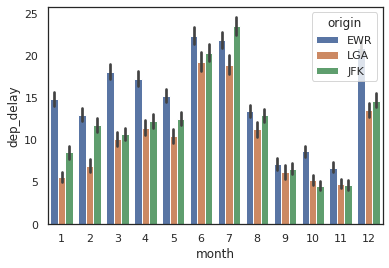

In [191]:
sns.set_theme(style="white")
sns.barplot('month','dep_delay','origin', data=flight_data);

2- Display number of flights for each carrier in 2013 

<AxesSubplot:xlabel='carrier', ylabel='Count'>

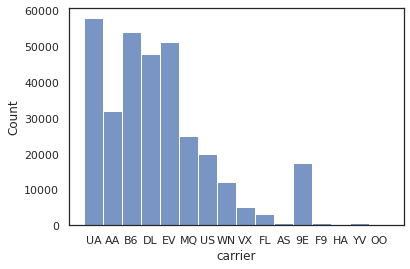

In [201]:
sns.histplot(flight_data['carrier'])